In [26]:
import sys
from dotenv import load_dotenv
import os

load_dotenv()

sys.path.append(os.getenv("ROOT"))
os.getenv("ROOT")

'/home/bwaits/Research/sf-trading-system'

In [27]:
print(sys.path)

['/home/bwaits/Research/sf-trading-system/reversal_research', '/home/bwaits/anaconda3/lib/python311.zip', '/home/bwaits/anaconda3/lib/python3.11', '/home/bwaits/anaconda3/lib/python3.11/lib-dynload', '', '/home/bwaits/Research/sf-trading-system/.venv/lib/python3.11/site-packages', '/home/bwaits/Research/sf-trading-system', '/home/bwaits/Research/sf-trading-system', '/home/bwaits/Research/sf-trading-system']


In [28]:
import pandas as pd
import polars as pl
import numpy as np
from datetime import date
from silverfund.datasets import CRSPDaily, Universe
import seaborn as sns
import matplotlib.pyplot as pltc
from matplotlib import pyplot as plt

In [29]:
# df = (CRSPDaily(start_date=date(2010, 1, 1),
#                 end_date=date(2015, 12, 31))
#                 .load_all()
#                 .select(["permno", "ticker", "date", "shrout", "prc", "ret"])
# )

# df

# df = (Universe(start_date=date(2010, 1, 1),
#                 end_date=date(2015, 12, 31))
#                 .load_all()
#                 .select(["permno", "ticker", "date", "shrout", "prc", "ret"])
# )

# df

In [30]:
# path = '/home/bwaits/fsl_groups/grp_quant/data/'
# files = os.listdir(path)
# dfs = []
# for file in files:
#     #if file.endswith('.parquet'):
#     for year in range(2010, 2024):
#         if file.endswith(f'mm_{year}.parquet'):
#             df = pl.read_parquet(f'{path}/{file}').to_pandas()

#             dfs.append(df)

df = pd.read_parquet("/home/bwaits/fsl_groups/grp_quant/data/mega_monthly.parquet")
# df = pd.concat(dfs)
df2 = df.copy()
df

,date,DataDate,cusip,permno,barrid,barra_ticker,issue_name,ncusip_crsp,ticker_crsp,shrcd_crsp,exchcd_crsp,siccd_crsp,prc_crsp,ret_crsp,retx_crsp,vol_crsp,shrout_crsp
0,1978-12-29,1979-02,00036110,54594,None,None,None,00036110,AIR,11.0,2.0,3662.0,11.750,-0.012917,-0.020833,273.0,1678.0
1,1978-12-29,1979-03,00036110,54594,None,None,None,00036110,AIR,11.0,2.0,3662.0,12.125,0.031915,0.031915,282.0,1678.0
2,1978-12-29,1979-04,00036110,54594,None,None,None,00036110,AIR,11.0,2.0,3662.0,11.000,-0.092784,-0.092784,148.0,1680.0
3,1978-12-29,1979-02,00080010,10006,None,None,None,00080010,ACF,10.0,1.0,3743.0,29.500,-0.011523,-0.028807,2556.0,8758.0
4,1978-12-29,1979-03,00080010,10006,None,None,None,00080010,ACF,10.0,1.0,3743.0,32.000,0.084746,0.084746,1594.0,8758.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635740,2024-10-31,2024-12,Y2685T13,15597,USBC8F1,USGNK,GENCO SHIPPING & TRADING LIMITED NEW,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1635741,2024-10-31,2024-12,Y4105310,16454,USBDIX1,USINSW,INTERNATIONAL SEAWAYS INC,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1635742,2024-10-31,2024-12,Y7388L10,92679,USACPW1,USSB,SAFE BULKERS INC,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1635743,2024-10-31,2024-12,Y7542C13,93299,USALLL1,USSTNG,SCORPIO TANKERS INC,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# df['DataDate'] = df['date']
df["DataDate"] = pd.to_datetime(df["date"], format="%Y%m%d")
# df = df[['DataDate', 'barrid', 'ret_crsp', 'vol_crsp', 'prc_crsp', 'mktcap_barra']] #'lag_ret', 'signal'
df = df[["DataDate", "barrid", "ret_crsp", "vol_crsp", "prc_crsp"]]  #'lag_ret', 'signal'
df["logret"] = np.log1p(df["ret_crsp"])
df["rev"] = df.groupby("barrid")["logret"].rolling(1, 1).sum().reset_index(drop=True)
df["rev"] = df.groupby("barrid")["rev"].shift(1)
df["prclag"] = df.groupby("barrid")["prc_crsp"].shift()
# df['melag'] = df.groupby('barrid')['mktcap_barra'].shift()
df = df.query("rev == rev and prclag >= 5").reset_index(drop=True)
df["bins"] = df.groupby("DataDate")["rev"].transform(pd.qcut, 10, labels=False)
df

/tmp/ipykernel_1320025/4111985385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['logret'] = np.log1p(df['ret_crsp'])
/tmp/ipykernel_1320025/4111985385.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rev'] = df.groupby('barrid')['logret'].rolling(1,1).sum().reset_index(drop=True)
/tmp/ipykernel_1320025/4111985385.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

ValueError: Bin edges must be unique: Index([0.06539534146217656, 0.06539534146217656, 0.06539534146217656,
       0.06539534146217656, 0.06539534146217656, 0.06539534146217656,
       0.06539534146217656, 0.06539534146217656, 0.06539534146217656,
       0.06539534146217656, 0.06539534146217656],
      dtype='float64', name=2008-09-30 00:00:00).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [ ]:
ew = df.groupby(["DataDate", "bins"])["logret"].mean().unstack(level="bins") * 100

ew["spread"] = ew[0] - ew[9]
ew

bins,0,1,2,3,4,5,6,7,8,9,spread
DataDate,,,,,,,,,,,
2010-02-16,1.709496,1.533331,1.490014,1.616982,1.814268,1.672515,1.699265,1.774461,1.545504,1.501567,0.207929
2010-02-17,0.498645,0.615338,0.460113,0.670673,0.691788,0.583030,0.636594,0.410986,0.582877,0.591003,-0.092358
2010-02-18,0.660444,0.670506,0.491096,0.598024,0.701435,0.776241,0.251106,0.813113,0.742016,0.857120,-0.196676
2010-02-19,0.343985,0.398855,0.144234,0.343536,0.371096,0.118103,0.570674,0.441850,0.538865,0.170038,0.173947
2010-02-22,0.273158,0.097944,-0.000631,0.048855,-0.007795,0.054351,0.158763,0.266311,0.279929,0.032429,0.240729
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-06,0.974395,0.974904,0.699937,0.784321,0.699513,0.937466,0.496246,0.951117,0.842973,0.724950,0.249445
2024-02-07,-0.552301,-0.156597,-0.343527,-0.389143,-0.279131,-0.240604,-0.241465,-0.040176,-0.413350,-0.285972,-0.266330
2024-02-08,0.762182,1.048629,1.150601,1.039952,0.974537,1.568618,1.023583,1.106247,1.187996,1.079545,-0.317363


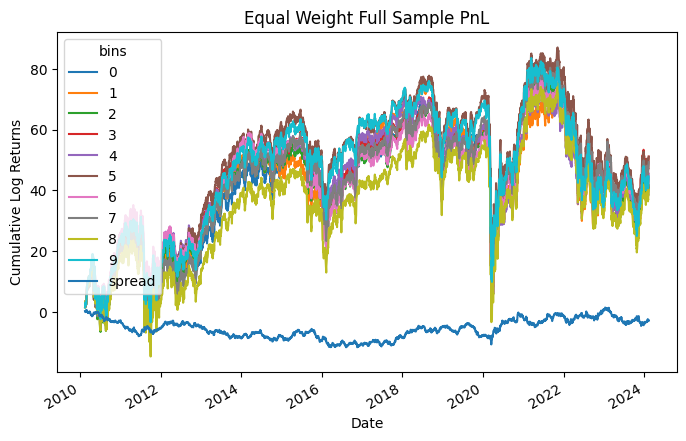

In [ ]:
ew.cumsum().plot(figsize=(8, 5))
plt.title("Equal Weight Full Sample PnL")
plt.ylabel("Cumulative Log Returns")
plt.xlabel("Date")
plt.show()

In [ ]:
# mcapsum = df.groupby(['DataDate','bins'])['melag'].sum()
# df['rme'] = df['logret']*df['melag']
# vw = df.groupby(['DataDate','bins'])['rme'].sum() / mcapsum
# vw = vw.unstack(level='bins')*100
# vw['spread'] = vw[0] - vw[9]
# vw

bins,0,1,2,3,4,5,6,7,8,9,spread
DataDate,,,,,,,,,,,
2010-02-16,1.732373,1.699657,1.611168,1.650844,1.891402,1.615876,1.888983,1.839333,1.783028,2.075820,-0.343447
2010-02-17,0.548491,-0.021383,0.435412,0.588127,0.684177,0.703863,0.222873,0.549123,0.600365,0.239805,0.308685
2010-02-18,0.758253,0.275594,0.542662,0.466667,0.671837,0.868751,0.768135,0.779254,0.627844,0.666704,0.091548
2010-02-19,0.279317,0.070147,0.357960,0.031063,0.263385,-0.027249,0.148518,0.113093,0.545693,0.289350,-0.010033
2010-02-22,-0.092107,-0.063888,-0.139072,-0.071817,-0.575352,-0.328892,-0.106878,0.279830,0.071002,-0.168199,0.076092
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-06,0.888584,0.073626,0.532969,0.707841,0.284384,0.019938,0.111669,0.012591,0.715135,0.319471,0.569113
2024-02-07,0.375410,1.753197,0.663187,-0.077241,0.356877,0.870617,0.454781,0.723920,0.590720,0.789285,-0.413876
2024-02-08,-0.083377,0.459556,0.248745,-0.234570,-0.017097,0.306735,0.326815,0.671912,0.617559,0.348691,-0.432068


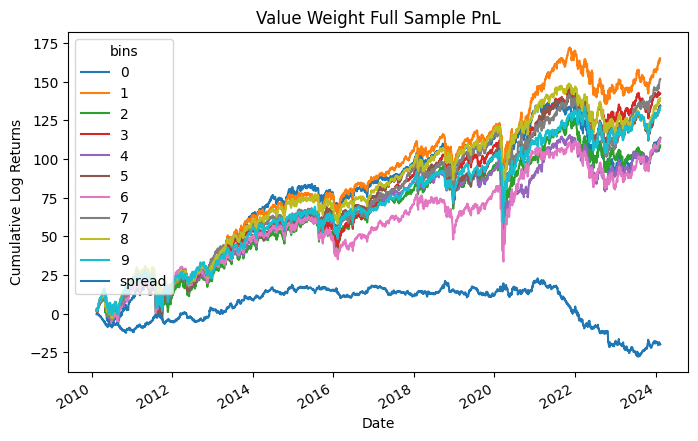

In [ ]:
# vw.cumsum().plot(figsize=(8,5))
# plt.title('Value Weight Full Sample PnL')
# plt.ylabel("Cumulative Log Returns")
# plt.xlabel("Date")
# plt.show()

In [ ]:
# df['logret'] = np.log1p(df['ret_barra'])
# df['rev'] = df.groupby('barraid')['logret'].rolling(22,22).sum().reset_index(drop=True)
# df['rev'] = df.groupby('barraid')['rev'].shift(2)
# df.head(15)

## Seth's Method

In [ ]:
df = df2.copy()

In [ ]:
# df = pl.read_parquet("/home/bwaits/fsl_groups/grp_quant/data/daily_merged/mm_2024.parquet")
# df = df.to_pandas()
# #df.index = df['DataDate']
# #df = df[['DataData', 'barrid', 'ret_barra']]
# df

In [ ]:
# df = pd.concat(dfs)
df["DataDate"] = pd.to_datetime(df["DataDate"], format="%Y%m%d")
# df.index = pd.to_datetime(df.index, format='%Y%m%d')
df["lag_ret"] = np.log1p(df.groupby("barrid")["ret_crsp"].shift(1))
mean = df.groupby("DataDate")["lag_ret"].mean()
std = df.groupby("DataDate")["lag_ret"].std()

df["sig_mean"] = df["DataDate"].map(mean)
df["sig_std"] = df["DataDate"].map(std)
# df['sig_mean'] = df.index.map(mean)
# df['sig_std'] = df.index.map(std)

# Mean reversion signal
df["signal"] = -1 * (df["lag_ret"] - df["sig_mean"]) / df["sig_std"]
df["signal"] = df["signal"].shift(1)
# Roughly mean zero and std one.. good!
# df = df[['DataDate', 'barrid', 'lag_ret', 'signal', 'vol_crsp']]
df = df[["DataDate", "barrid", "lag_ret", "vol_crsp", "signal", "prc_crsp"]]  #'lag_ret', 'signal'
df

,DataDate,barrid,lag_ret,vol_crsp,signal,price_barra,mktcap_barra
0,2010-02-11,USAKEG1,NaN,2708800.0,NaN,26.69,4.494116e+09
1,2010-02-12,USAKEG1,0.019675,1932500.0,-0.136414,26.76,4.505902e+09
2,2010-02-16,USAKEG1,0.002620,2204900.0,0.119621,27.51,4.632189e+09
3,2010-02-17,USAKEG1,0.027641,2336500.0,-0.474638,27.15,4.571571e+09
4,2010-02-18,USAKEG1,-0.013172,3268200.0,0.910200,27.81,4.682703e+09
...,...,...,...,...,...,...,...
740924,2024-02-06,USAF151,-0.021511,378120.0,0.107219,101.66,8.297811e+09
740925,2024-02-07,USAF151,0.018465,420299.0,-0.230218,100.84,8.230880e+09
740926,2024-02-08,USAF151,-0.008099,1035111.0,0.078788,102.06,8.330460e+09
740927,2024-02-09,USAF151,0.012025,1103380.0,0.013121,101.14,8.255367e+09


In [ ]:
# df['rev'] = df.groupby('barrid')['logret'].rolling(22,22).sum().reset_index(drop=True)
# df['rev'] = df.groupby('barrid')['rev'].shift(2)

df["prclag"] = df.groupby("barrid")["prc_crsp"].shift()
# df['melag'] = df.groupby('barrid')['mktcap_barra'].shift()
df = df.query("signal == signal and prclag >= 5").reset_index(drop=True)
df["bins"] = df.groupby("DataDate")["signal"].transform(pd.qcut, 10, labels=False)
df

,DataDate,barrid,lag_ret,vol_crsp,signal,price_barra,mktcap_barra,prclag,melag,bins
0,2010-02-12,USAKEG1,0.019675,1932500.0,-0.136414,26.76,4.505902e+09,26.69,4.494116e+09,3
1,2010-02-16,USAKEG1,0.002620,2204900.0,0.119621,27.51,4.632189e+09,26.76,4.505902e+09,5
2,2010-02-17,USAKEG1,0.027641,2336500.0,-0.474638,27.15,4.571571e+09,27.51,4.632189e+09,2
3,2010-02-18,USAKEG1,-0.013172,3268200.0,0.910200,27.81,4.682703e+09,27.15,4.571571e+09,9
4,2010-02-19,USAKEG1,0.024018,2673700.0,-0.559937,28.32,4.768578e+09,27.81,4.682703e+09,1
...,...,...,...,...,...,...,...,...,...,...
9655499,2024-02-06,USAF151,-0.021511,378120.0,0.107219,101.66,8.297811e+09,99.80,8.145992e+09,7
9655500,2024-02-07,USAF151,0.018465,420299.0,-0.230218,100.84,8.230880e+09,101.66,8.297811e+09,2
9655501,2024-02-08,USAF151,-0.008099,1035111.0,0.078788,102.06,8.330460e+09,100.84,8.230880e+09,6
9655502,2024-02-09,USAF151,0.012025,1103380.0,0.013121,101.14,8.255367e+09,102.06,8.330460e+09,4


In [ ]:
ew = df.groupby(["DataDate", "bins"])["lag_ret"].mean().unstack(level="bins") * 100

ew["spread"] = ew[0] - ew[9]
ew

bins,0,1,2,3,4,5,6,7,8,9,spread
DataDate,,,,,,,,,,,
2010-02-12,5.694542,3.389053,2.528471,1.991776,1.554609,1.184517,0.835667,0.477324,0.023410,-1.883524,7.578066
2010-02-16,3.987240,2.057707,1.385701,0.905326,0.534305,0.239567,-0.059569,-0.401999,-0.875324,-2.547543,6.534783
2010-02-17,5.476384,3.344074,2.636159,2.129647,1.716065,1.336665,0.963310,0.526682,0.000176,-1.520476,6.996860
2010-02-18,4.124500,1.976779,1.345816,0.935697,0.606854,0.310630,0.031469,-0.281790,-0.805975,-2.291425,6.415925
2010-02-19,3.884812,2.129548,1.575775,1.195889,0.854085,0.493916,0.185088,-0.121240,-0.646252,-3.004289,6.889101
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-06,2.699458,0.172049,-0.444807,-0.824568,-1.190708,-1.542232,-1.907691,-2.330252,-3.002189,-5.208664,7.908121
2024-02-07,5.562826,2.635267,1.811989,1.273884,0.849708,0.478397,0.145810,-0.214046,-0.824349,-3.289875,8.852700
2024-02-08,3.974713,1.498264,0.830313,0.373587,-0.008319,-0.371374,-0.756985,-1.266075,-2.045948,-5.135339,9.110052


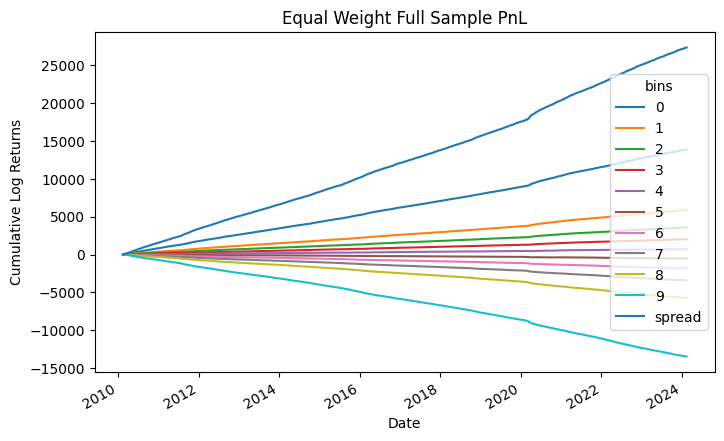

In [ ]:
ew.cumsum().plot(figsize=(8, 5))
plt.title("Equal Weight Full Sample PnL")
plt.ylabel("Cumulative Log Returns")
plt.xlabel("Date")
plt.show()

In [ ]:
# mcapsum = df.groupby(['DataDate','bins'])['melag'].sum()
# df['rme'] = df['lag_ret']*df['melag']
# vw = df.groupby(['DataDate','bins'])['rme'].sum() / mcapsum
# vw = vw.unstack(level='bins')*100
# vw['spread'] = vw[0] - vw[9]
# vw

bins,0,1,2,3,4,5,6,7,8,9,spread
DataDate,,,,,,,,,,,
2010-02-12,5.417851,3.375042,2.500329,1.985033,1.592195,1.219218,0.803064,0.475044,0.075652,-1.164373,6.582224
2010-02-16,3.939921,2.004062,1.337342,0.894290,0.536839,0.234756,-0.059828,-0.385734,-0.792101,-1.781318,5.721240
2010-02-17,4.919367,3.292491,2.659113,2.111550,1.718638,1.359848,0.980716,0.559079,0.040914,-1.050518,5.969885
2010-02-18,3.690741,1.978903,1.340600,0.919352,0.613492,0.317184,0.003494,-0.296411,-0.803066,-1.784586,5.475327
2010-02-19,3.719792,2.107395,1.538750,1.200068,0.845834,0.481021,0.212128,-0.085881,-0.650020,-2.023240,5.743033
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-06,2.159945,0.107620,-0.473089,-0.831281,-1.271537,-1.530283,-1.909079,-2.320267,-3.144270,-4.652486,6.812431
2024-02-07,5.390902,2.567632,1.813633,1.315887,0.829941,0.448345,0.176235,-0.121894,-0.812782,-2.243757,7.634659
2024-02-08,2.912638,1.496262,0.859162,0.361511,0.020141,-0.330394,-0.736142,-1.277004,-1.991219,-4.857345,7.769983


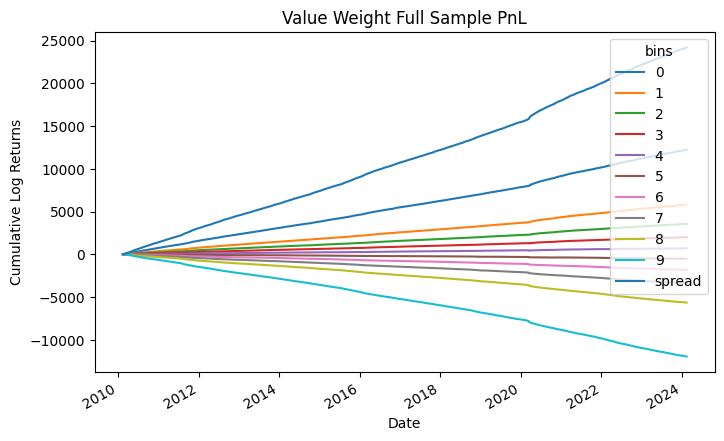

In [ ]:
# vw.cumsum().plot(figsize=(8,5))
# plt.title('Value Weight Full Sample PnL')
# plt.ylabel("Cumulative Log Returns")
# plt.xlabel("Date")
# plt.show()

In [ ]:
# Roughly mean zero and std one.. good!
# df = df[['DataDate', 'barrid', 'lag_ret', 'signal', 'vol_crsp']]

# %%
# alpha = df.pivot(index='DataDate', columns='barrid', values='signal')
# # alpha = df.pivot(index=df.index, columns='!Barrid', values='signal')
# alpha.to_parquet('/home/bwaits/Research/sf-trading-system/reversal_research/alphas.parquet')
# alpha

In [ ]:
# import pandas as pd
# from silverfund.backtester import MVBacktester
# from silverfund.components.optimizers.constraints import *

In [ ]:
# # %%
# alphas_df = pd.read_parquet('/home/bwaits/Research/sf-trading-system/reversal_research/alphas.parquet')
# # %%
# mv_backtester = MVBacktester(
#     alpha = alphas_df.copy(),
#     constraints = [FullInvestmentConstraint()]
# )
# # %%
# port = mv_backtester.get_optimal_portfolio_history(n_cpus=16)
# # %%
# port.to_parquet('/home/bwaits/Research/sf-trading-system/reversal_research/portfolios.parquet')

In [ ]:
df

,DataDate,barrid,lag_ret,vol_crsp,signal,price_barra,mktcap_barra,prclag,melag,bins,rme
0,2010-02-12,USAKEG1,0.019675,1932500.0,-0.136414,26.76,4.505902e+09,26.69,4.494116e+09,3,8.842248e+07
1,2010-02-16,USAKEG1,0.002620,2204900.0,0.119621,27.51,4.632189e+09,26.76,4.505902e+09,5,1.180351e+07
2,2010-02-17,USAKEG1,0.027641,2336500.0,-0.474638,27.15,4.571571e+09,27.51,4.632189e+09,2,1.280403e+08
3,2010-02-18,USAKEG1,-0.013172,3268200.0,0.910200,27.81,4.682703e+09,27.15,4.571571e+09,9,-6.021846e+07
4,2010-02-19,USAKEG1,0.024018,2673700.0,-0.559937,28.32,4.768578e+09,27.81,4.682703e+09,1,1.124703e+08
...,...,...,...,...,...,...,...,...,...,...,...
9655499,2024-02-06,USAF151,-0.021511,378120.0,0.107219,101.66,8.297811e+09,99.80,8.145992e+09,7,-1.752260e+08
9655500,2024-02-07,USAF151,0.018465,420299.0,-0.230218,100.84,8.230880e+09,101.66,8.297811e+09,2,1.532229e+08
9655501,2024-02-08,USAF151,-0.008099,1035111.0,0.078788,102.06,8.330460e+09,100.84,8.230880e+09,6,-6.665948e+07
9655502,2024-02-09,USAF151,0.012025,1103380.0,0.013121,101.14,8.255367e+09,102.06,8.330460e+09,4,1.001771e+08
